In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [4]:
file_path = 'final_data 2.csv'
df = pd.read_csv(file_path)

In [5]:
df2 = df[['fg3_pct', 'fg3a', 'fg3m']]

In [13]:
df3 = df2.select_dtypes(include=[np.number])

In [14]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df3)


In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # or median, or most_frequent
scaled_df = imputer.fit_transform(scaled_df)


/Users/nicolasrousselot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nicolasrousselot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nicolasrousselot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nicolasrousselot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

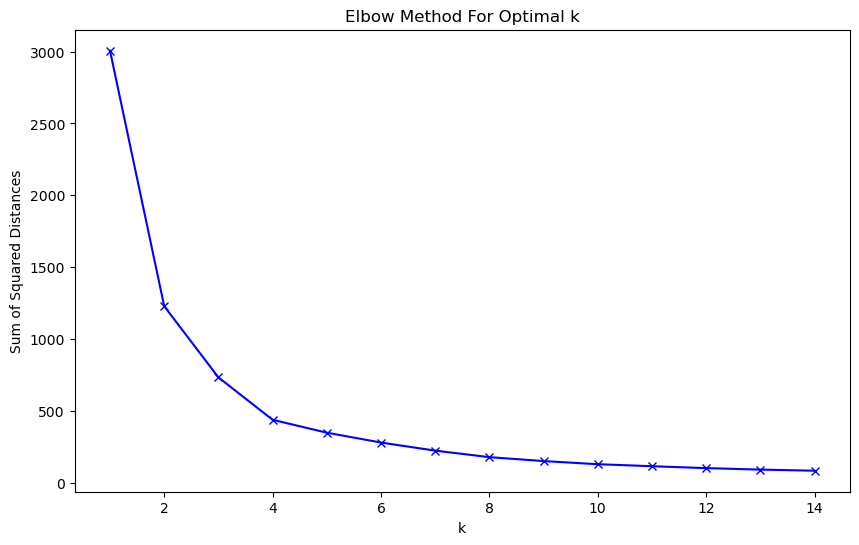

In [17]:
ssd = []
K = range(1, 15)  # Adjust the range as needed
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    ssd.append(model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [18]:
# Choose k (e.g., 3) based on the Elbow Method plot
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(scaled_df)


In [19]:
df['Cluster'] = kmeans.labels_
# Now, you can analyze the clusters
# For example, to see the average stats per cluster:
cluster_analysis = df.groupby('Cluster').mean()


/var/folders/q1/fr3jskyj5ns7nvrh1nkj8t280000gn/T/ipykernel_39393/864821395.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('Cluster').mean()


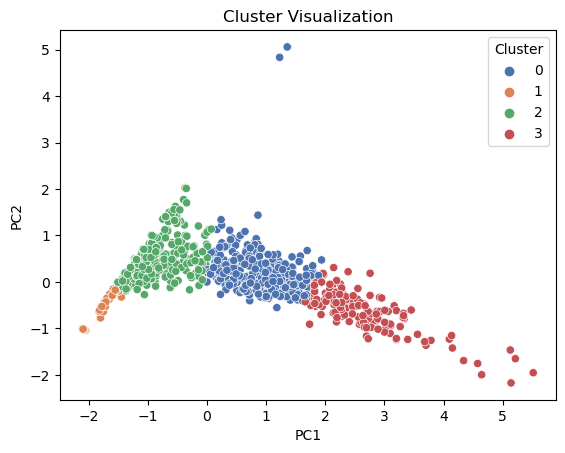

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

finalDf = pd.concat([principalDf, df[['Cluster']]], axis=1)

sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=finalDf, palette="deep")
plt.title('Cluster Visualization')
plt.show()
